# Two-Sample Test : Case (1)

- (1) cold-rolled steel vs (2) two-sided galvanized steel
- (1) cold-rolled steel : $m=20$, $\bar{x}=29.8$
- (2) two-sided galvanized steel : $n=25$, $\bar{y}=34.7$
- Null hypothesis : $\mu_{x} = \mu_{y}$ vs Alternative : $\mu_{x} \neq  \mu_{y}$ (Two-sided test)
- signifiance level $\alpha=0.01$

- Test statistic : $\bar{X} - \bar{Y}$
- Two populations are normal with 4 and 5, respectively.
- Thus, the test statistic is normally distributed, so we can use the Z variable for standard normal distribution
- $Z = \frac{\bar{X}-\bar{Y} - (\mu_{x}-\mu_{y})}{\sqrt{\sigma_{x}^2/m+ \sigma_{y}^2/n}}$

## Step I. Significance level

- The significance lvel $\alpha$=0.01 is given here.

In [1]:
alpha = 0.01

## Step II. Rejection region corresponding to significance level and alternative hypothesis

In [5]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

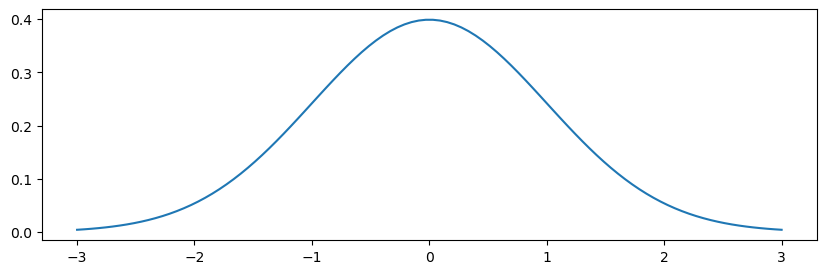

In [8]:
rv = norm(loc=0, scale=1)

x = np.linspace(-3, 3, 100)
y = rv.pdf(x)

fig, ax = plt.subplots(1,1, figsize=(10,3))
ax.plot(x, y)
plt.show()

- The rejection region consists of two parts, each of which has 0.005 area, since the given significance level is 0.01.
- By using percentiles of standard normal distribution, we can obtain the rejection region. 

In [7]:
lower_bound = rv.ppf(0.005)
upper_bound = rv.ppf(1-0.005)
print(lower_bound, upper_bound)

-2.575829303548901 2.5758293035489004


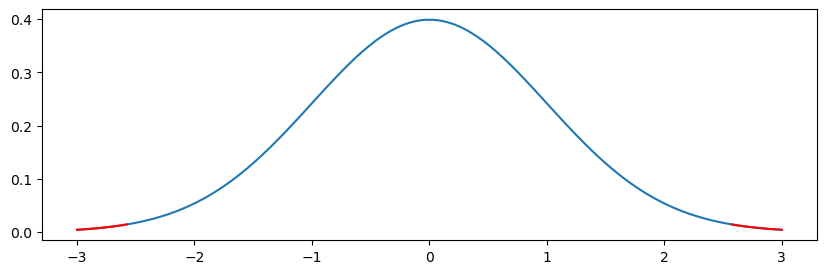

In [10]:
x = np.linspace(-3, 3, 100)
x1 = np.linspace(-3, lower_bound, 100)
x2 = np.linspace(upper_bound, 3, 100)
y = rv.pdf(x)

fig, ax = plt.subplots(1,1, figsize=(10,3))
ax.plot(x, y)
ax.plot(x1, rv.pdf(x1), color="red")
ax.plot(x2, rv.pdf(x2), color="red")
plt.show()

## Step 3. Calculate z-value of the test statistic

In [11]:
sample_mean_x = 29.8
sample_mean_y = 34.7
m, n = 20, 25
sigma_x, sigma_y = 4, 5
sigma = np.sqrt(sigma_x**2/m + sigma_y**2/n)
z = (sample_mean_x-sample_mean_y-0)/sigma

In [12]:
print(z)

-3.652244363249658


## Step 4. Find out whether the z value is inside the rejection region or not.

In [13]:
lower_bound = rv.ppf(0.005)
upper_bound = rv.ppf(1-0.005)
print(lower_bound, upper_bound)
print(z)

-2.575829303548901 2.5758293035489004
-3.652244363249658


- The z value for the test statistic is inside the lower side of the rejection region. 
- It means that we reject the null hypothesis. In other words, we accept the alternative one, which states $\mu_{x} \neq \mu_{y}$.

----

# Case 2 : Large-Sample Case

- (1) people who eat fast food usually (X) vs (2) people who do not eat fast food usually (Y)
- Null Hypothesis : $\mu_{x} - \mu_{y} = 200$
- Alternative Hypothesis : $\mu_{x} - \mu_{y} > 200$ (upper-sided test needed)
- From Central limit theorem, we can use z-test, where $Z=\frac{\bar{X}-\bar{Y}-(\mu_{x}-\mu_{y})}{\sqrt{s_{x}^2/m+s_{y}^2/n}}$

In [14]:
m, n = 413,663
sample_mean_x = 2637
sample_mean_y = 2258
sx = 1138
sy = 1519

## Step 01. Significance level

In [15]:
alpha = 0.05

## Step 02. Rejection Region

In [16]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

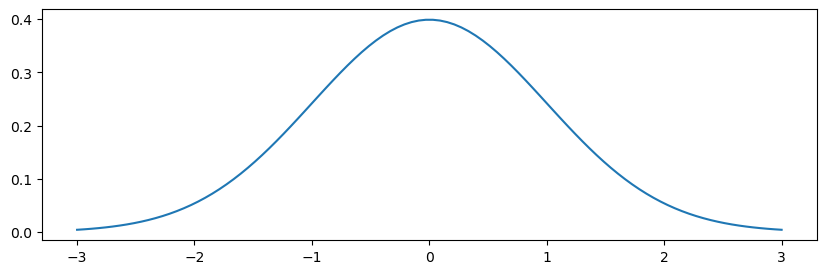

In [17]:
rv = norm(loc=0, scale=1)

x = np.linspace(-3, 3, 100)
y = rv.pdf(x)

fig, ax = plt.subplots(1,1, figsize=(10,3))
ax.plot(x, y)
plt.show()

In [18]:
upper_bound = rv.ppf(1-alpha)
print(upper_bound)

1.6448536269514722


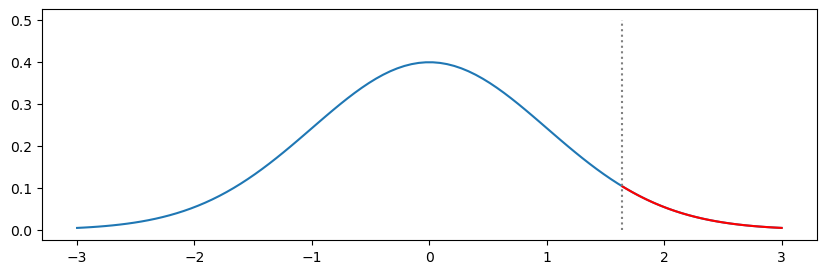

In [20]:
x = np.linspace(-3, 3, 100)
x2 = np.linspace(upper_bound, 3, 100)
y = rv.pdf(x)

fig, ax = plt.subplots(1,1, figsize=(10,3))
ax.plot(x, y)
ax.plot(x2, rv.pdf(x2), color="red")
ax.vlines(upper_bound, 0, 0.5, color="gray", ls=":")
plt.show()

## Step 03. Calculate the z-value corresponding to a test statistic

- $Z=\frac{\bar{X}-\bar{Y}-(\mu_{x}-\mu_{y})}{\sqrt{s_{x}^2/m+s_{y}^2/n}}$

In [21]:
z = ((sample_mean_x - sample_mean_y) - (200)) / np.sqrt(sx**2/m+sy**2/n)
print(z)

2.2006914040751693


## Step 04. Verify whether z-value is inside or outside the rejection region

In [22]:
print(upper_bound)
print(z)

1.6448536269514722
2.2006914040751693


- The z-value is inside the rejection region (upper-sided), so we reject the null hypothesis.
- It means that $\mu_{x}-\mu_{y}$ is larger than 200. (Alternative hypothesis)

# Case 3: Using t-Test

- Not large sample
- popluation variances are unknown.
- populations seem to be normal (after doing some normality test)

- (1) no fusion (X) vs (2) fusion (Y)
- Null hypotheis : $\mu_{x} - \mu_{y} = 0$
- Alternative hypotheis : $\mu_{x} - \mu_{y} < 0$ (lower-sided test)
- If the fusion process acutally increases tensile strength, $\mu_{x} - \mu_{y} < 0$ holds. 

## Step 0. Sample data 

In [23]:
X = [2748, 2700, 2655, 2822, 2511, 3149, 3257, 3213, 3220, 2753]
Y = [3027, 3356, 3359, 3297, 3125, 2910, 2889, 2902]

In [24]:
m, n = len(X), len(Y)
print(m,n)

10 8


In [25]:
barX = np.mean(X)
barY = np.mean(Y)
Sx = np.std(X, ddof=1)
Sy = np.std(Y, ddof=1)
print(barX, barY, Sx, Sy)

2902.8 3108.125 277.26513584573803 205.869887827933


## Step 01. Significance level

In [26]:
alpha = 0.05

## Step 02. Rejection Region

In [27]:
import numpy as np
from scipy.stats import t
import matplotlib.pyplot as plt

- We need to determine the degree of freedom for t-distribution

In [28]:
nu = (Sx**2/m + Sy**2/n)**2 / ((Sx**2/m)**2 / (m-1) + (Sy**2/n)**2 / (n-1))
print(nu)

15.943548718750007


In [29]:
nu = 15

In [30]:
rv = t(df=nu)

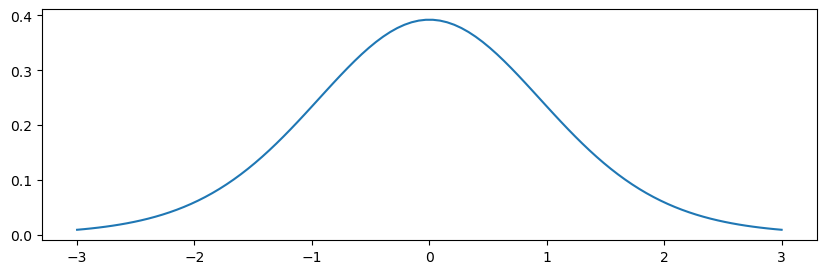

In [31]:
x = np.linspace(-3, 3, 100)
y = rv.pdf(x)

fig, ax = plt.subplots(1,1, figsize=(10,3))
ax.plot(x, y)
plt.show()

In [32]:
lower_boundary = rv.ppf(0.05)
print(lower_boundary)

-1.7530503556925552


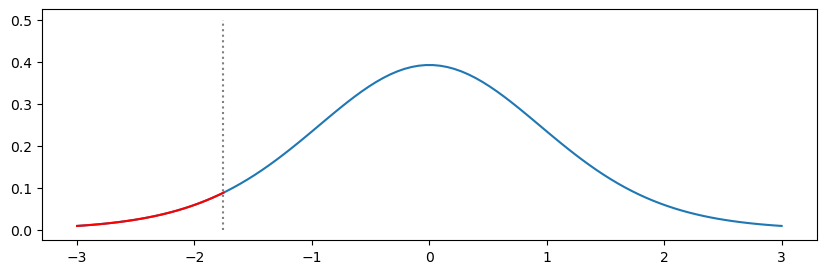

In [34]:
x = np.linspace(-3, 3, 100)
x1 = np.linspace(-3, lower_boundary, 100)
y = rv.pdf(x)

fig, ax = plt.subplots(1,1, figsize=(10,3))
ax.plot(x, y)
ax.plot(x1, rv.pdf(x1), color="red")
ax.vlines(lower_boundary, 0, 0.5, color="gray", ls=":")
plt.show()

## Step 03. Caclulate t-value for test statistic.

In [35]:
T = (barX - barY) / np.sqrt(Sx**2/m + Sy**2/n)
print(T)

-1.801831675482715


## Step 04. Compare t-value and rejection region

In [36]:
print(lower_boundary)
print(T)

-1.7530503556925552
-1.801831675482715


- Since T=-1.80 < -1.753, so the t-value is inside the rejection region. 
- So we reject the null hypothesis. The fusion process enhances the tensile strength of the liner. 